In [1]:
!pip install tensorflow-io --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.0/28.0 MB 37.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 53.5 MB/s eta 0:00:00:00:01
  Attempting uninstall: tensorflow-io-gcs-filesystem
    Found existing installation: tensorflow-io-gcs-filesystem 0.31.0
    Uninstalling tensorflow-io-gcs-filesystem-0.31.0:
      Successfully uninstalled tensorflow-io-gcs-filesystem-0.31.0
  Attempting uninstall: tensorflow-io
    Found existing installation: tensorflow-io 0.31.0
    Uninstalling tensorflow-io-0.31.0:
      Successfully uninstalled tensorflow-io-0.31.0


In [3]:
# from sklearn.model_selection import train_test_split
# from keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
# from PIL import Image
# from tensorflow.keras.preprocessing.image import load_img, img_to_array
# from keras.utils import to_categorical
import matplotlib.pyplot as plt
import pandas as pd
import pickle

In [4]:
# Leer el dataset desde el archivo
with open('/kaggle/input/dataset-terrains/dataset_terrains.pickle', 'rb') as file:
    data = pickle.load(file)

train_images = data['train_images']
train_labels = data['train_labels']

test_images = data['test_images']
test_labels = data['test_labels']

val_images = data['val_images']
val_labels = data['val_labels']

## **Diseño de la red neuronal**

In [18]:
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
import tensorflow as tf
import random
import os

# Semilla para reproducir modelo
seed_value= 42

#Ninguna semilla afecta a la otra

# Set `PYTHONHASHSEED` environment variable at a fixed value
os.environ['PYTHONHASHSEED']=str(seed_value)
random.seed(seed_value)

# Sembrar una semilla en NumPy
np.random.seed(seed_value)

# Sembrar una semilla en TensorFlow
tf.random.set_seed(seed_value)

In [19]:
base_filtros = 32
w_regulatizer = 1e-4
num_clases = len(train_labels[0])

model = Sequential()
## conv 1
model.add(Conv2D(base_filtros, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regulatizer),
                 input_shape=train_images.shape[1:] + (1,)))
model.add(Activation('relu'))
model.add(BatchNormalization())

## conv 2
model.add(Conv2D(base_filtros, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regulatizer)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

## conv 3
model.add(Conv2D(2*base_filtros, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regulatizer)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

## conv 4
model.add(Conv2D(2*base_filtros, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regulatizer)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

## conv 5
model.add(Conv2D(4*base_filtros, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regulatizer)))
model.add(Activation('relu'))
model.add(BatchNormalization())


## conv 6
model.add(Conv2D(4*base_filtros, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regulatizer)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

## Clasificacion - Flatten

model.add(Flatten())
model.add(Dense(num_clases,activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 450, 300, 32)      320       
                                                                 
 activation_18 (Activation)  (None, 450, 300, 32)      0         
                                                                 
 batch_normalization_18 (Bat  (None, 450, 300, 32)     128       
 chNormalization)                                                
                                                                 
 conv2d_19 (Conv2D)          (None, 450, 300, 32)      9248      
                                                                 
 activation_19 (Activation)  (None, 450, 300, 32)      0         
                                                                 
 batch_normalization_19 (Bat  (None, 450, 300, 32)     128       
 chNormalization)                                     

In [20]:
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping

# Definir el early stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(),
             metrics=['accuracy'])

In [21]:
hist = model.fit(train_images, train_labels, batch_size=32,epochs=50,
          validation_data=(val_images, val_labels),
          verbose=2, shuffle=True, callbacks=[early_stopping])

Epoch 1/50


2023-06-20 06:07:03.857495: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_3/dropout_12/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


73/73 - 59s - loss: 18.4297 - accuracy: 0.5991 - val_loss: 81.4668 - val_accuracy: 0.4251 - 59s/epoch - 804ms/step
Epoch 2/50
73/73 - 53s - loss: 8.8901 - accuracy: 0.7429 - val_loss: 13.5124 - val_accuracy: 0.6460 - 53s/epoch - 731ms/step
Epoch 3/50
73/73 - 54s - loss: 7.5651 - accuracy: 0.7881 - val_loss: 36.2900 - val_accuracy: 0.4845 - 54s/epoch - 733ms/step
Epoch 4/50
73/73 - 54s - loss: 5.2227 - accuracy: 0.8359 - val_loss: 16.3440 - val_accuracy: 0.6563 - 54s/epoch - 733ms/step
Epoch 5/50
73/73 - 53s - loss: 3.3267 - accuracy: 0.8682 - val_loss: 38.4131 - val_accuracy: 0.5491 - 53s/epoch - 732ms/step
Epoch 6/50
73/73 - 53s - loss: 3.2351 - accuracy: 0.8820 - val_loss: 17.6773 - val_accuracy: 0.6964 - 53s/epoch - 732ms/step
Epoch 7/50
73/73 - 53s - loss: 3.0396 - accuracy: 0.9009 - val_loss: 18.9807 - val_accuracy: 0.7351 - 53s/epoch - 732ms/step
Epoch 8/50
73/73 - 53s - loss: 1.9612 - accuracy: 0.9229 - val_loss: 72.0561 - val_accuracy: 0.4961 - 53s/epoch - 731ms/step
Epoch 9/50

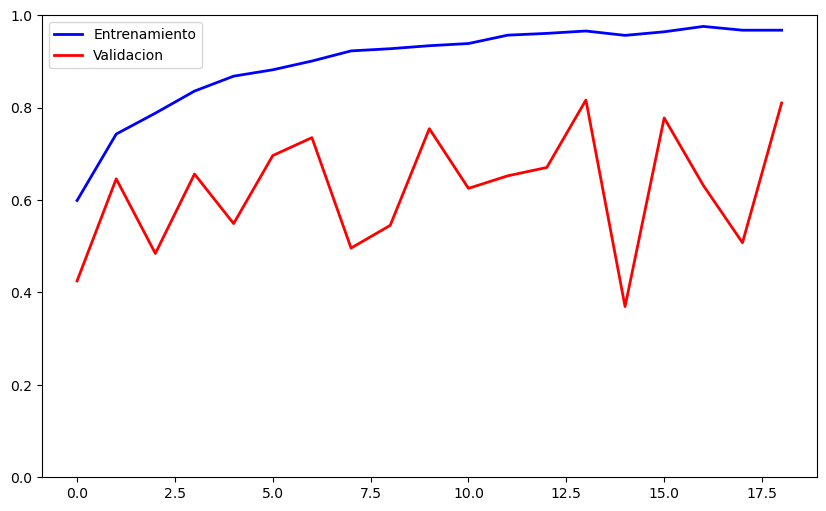

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(hist.history['accuracy'], color='blue', linewidth=2, label='Entrenamiento')
plt.plot(hist.history['val_accuracy'], color='red', linewidth=2, label='Validacion')
# Personalizar los límites del eje y
plt.ylim(0, 1)
plt.legend()
plt.show()

In [ ]:
# Guardar el modelo entrenado
model.save('modelo_entrenado.h5')
print('Modelo guardado exitosamente')

In [5]:
from tensorflow.keras.models import load_model

# Cargar el modelo guardado
#modelo_entrenado = load_model('modelo_entrenado.h5')
modelo_entrenado = load_model('/kaggle/input/modelo-entrenado/modelo_entrenado.h5')

print(modelo_entrenado)

# Utilizar el modelo para hacer predicciones
predicciones = modelo_entrenado.predict(test_images)

# Convertir las predicciones de categorías a enteros
predicciones = np.argmax(predicciones, axis=1)
predicciones

25/25 [==============================] - 11s 118ms/step


array([1, 1, 1, 0, 2, 0, 0, 2, 1, 0, 3, 1, 3, 1, 1, 0, 2, 3, 1, 2, 1, 3,
       2, 2, 0, 2, 0, 2, 1, 2, 2, 3, 2, 3, 2, 0, 3, 2, 2, 1, 2, 2, 3, 3,
       0, 2, 0, 3, 1, 2, 3, 1, 1, 2, 2, 0, 0, 0, 0, 2, 1, 1, 1, 3, 1, 2,
       2, 3, 1, 0, 3, 1, 3, 0, 2, 0, 2, 0, 0, 2, 3, 3, 1, 0, 2, 1, 2, 2,
       3, 3, 2, 1, 0, 0, 0, 1, 1, 3, 1, 3, 1, 2, 1, 1, 3, 2, 3, 1, 1, 3,
       2, 0, 2, 0, 3, 2, 0, 3, 1, 2, 1, 2, 2, 3, 2, 0, 3, 3, 1, 0, 3, 2,
       2, 1, 0, 2, 0, 0, 2, 1, 1, 0, 0, 2, 1, 1, 3, 3, 1, 0, 3, 1, 0, 3,
       0, 1, 3, 0, 0, 2, 2, 3, 1, 2, 3, 1, 2, 2, 0, 2, 0, 3, 0, 1, 2, 0,
       0, 3, 1, 0, 1, 0, 0, 3, 2, 0, 0, 2, 3, 2, 1, 3, 1, 1, 0, 0, 3, 3,
       1, 1, 2, 1, 1, 1, 1, 2, 3, 3, 2, 0, 0, 2, 2, 1, 1, 1, 3, 1, 3, 1,
       3, 1, 3, 3, 2, 1, 3, 3, 3, 0, 0, 2, 1, 1, 0, 2, 1, 1, 3, 1, 0, 3,
       3, 3, 2, 2, 2, 0, 0, 3, 0, 0, 1, 3, 3, 1, 3, 0, 1, 0, 2, 0, 0, 1,
       3, 1, 0, 3, 0, 0, 3, 1, 2, 1, 1, 0, 1, 2, 1, 0, 2, 0, 2, 2, 3, 1,
       3, 2, 3, 1, 3, 3, 1, 1, 1, 3, 3, 2, 1, 0, 3,

In [6]:
# Utilizar el modelo para hacer predicciones
predicciones = modelo_entrenado.predict(test_images)

# Convertir las predicciones de categorías a enteros
predicciones = np.argmax(predicciones, axis=1)
predicciones

etiquetas_dict = {0: 'CARRETERA', 1: 'TIERRA SECA', 2: 'TIERRA LODOSA', 3: 'PEDREGOSO'}

true_test_label = np.argmax(test_labels, axis=1)

df_test_labels = pd.DataFrame({'True Label': list(true_test_label),
                           'Pred Label': list(predicciones)})


cols = ['Terreno','Precision']

df_accuracy = pd.DataFrame(columns = cols)   

for key, value in etiquetas_dict.items():
    df_temp = df_test_labels[df_test_labels['True Label'] == key].copy()
    df_accuracy_temp = pd.DataFrame([{'Terreno': value,
                                      'Precision':round(100*len(df_temp[df_temp['Pred Label'] == key]) / len(df_temp),1)}])
    df_accuracy = pd.concat([df_accuracy, df_accuracy_temp], axis=0)
    df_accuracy = df_accuracy.reset_index(drop=True)

df_accuracy

25/25 [==============================] - 2s 90ms/step


,Terreno,Precision
0,CARRETERA,91.3
1,TIERRA SECA,84.3
2,TIERRA LODOSA,73.5
3,PEDREGOSO,88.0


Etiqueta correcta: TIERRA SECA
Etiqueta predicha: TIERRA SECA
(450, 300)
[[107 107 107 ... 118 117 117]
 [107 106 106 ... 118 117 117]
 [108 108 108 ... 118 117 117]
 ...
 [ 78  79  89 ... 107 108 107]
 [ 76  82  88 ...  97  99 101]
 [ 75  85  87 ...  85  85  86]]


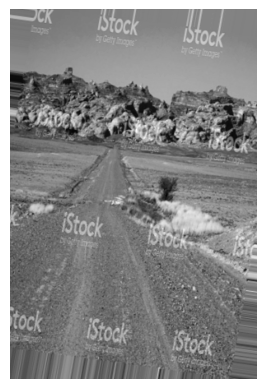

In [12]:
etiquetas_dict = {0: 'CARRETERA', 1: 'TIERRA SECA', 2: 'TIERRA LODOSA', 3: 'PEDREGOSO'}

true_test_label = np.argmax(test_labels, axis=1)

i = 375
print(f'Etiqueta correcta: {etiquetas_dict[true_test_label[i]]}')

print(f'Etiqueta predicha: {etiquetas_dict[predicciones[i]]}')

print(test_images[i].shape)
print(test_images[i])
plt.imshow(test_images[i], cmap='gray')
plt.axis('off')
plt.show()

In [10]:
test_labels[0]

array([0., 1., 0., 0.], dtype=float32)